In [3]:
# 6.7 원유 생산 데이터 : 표 6.19 에 있는 데이터는 1880 ~ 1988 년 동안의 연간 세계 원유 생산량이다.
# (단위 : 백만 배럴). 데이터는 Moore & McCabe(1993), p.147 로부터 취한 것이다.

library(ggplot2) # ggplot
library(ggfortify) # autoplot
library(gridExtra)

#setwd('H:/01.Korea/01.2019-1학기/05.회귀분석 방법론/Report/Chapter6')
setwd('D:/Working/03.Korea/회귀분석/report/Chapter6')
p189_data <- read.table("P189.txt", header = TRUE)
str(p189_data)

'data.frame':	29 obs. of  2 variables:
 $ Year   : int  1880 1890 1900 1905 1910 1915 1920 1925 1930 1935 ...
 $ Barrels: int  30 77 149 215 328 432 689 1069 1412 1655 ...



Call:
lm(formula = Barrels ~ Year, data = p189_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5968.7 -3441.4   392.8  2672.9  7472.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -469758.40   46165.28  -10.18 9.76e-11 ***
Year            245.91      23.69   10.38 6.32e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3954 on 27 degrees of freedom
Multiple R-squared:  0.7997,	Adjusted R-squared:  0.7922 
F-statistic: 107.8 on 1 and 27 DF,  p-value: 6.325e-11


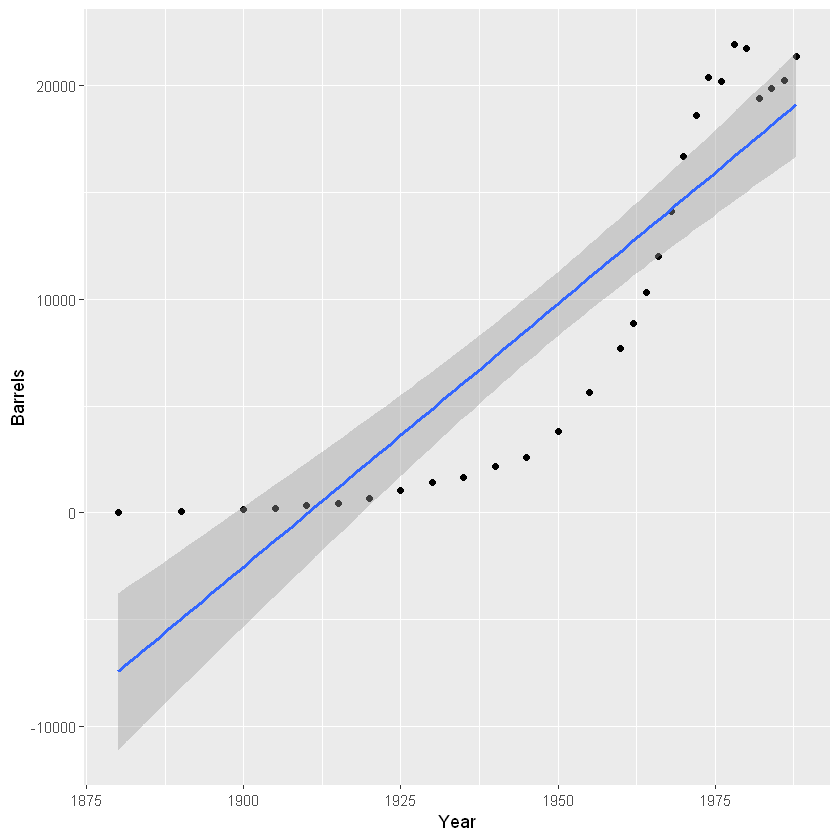

In [4]:
# (a) 원유 생산량 (OIL) 대 연도 (Year) 의 산점도를 작성하여라.
p189_reg <- lm(Barrels ~ Year, data = p189_data)
summary(p189_reg)
ggplot(p189_data,aes(Year, Barrels)) + geom_point() + geom_smooth(method='lm')

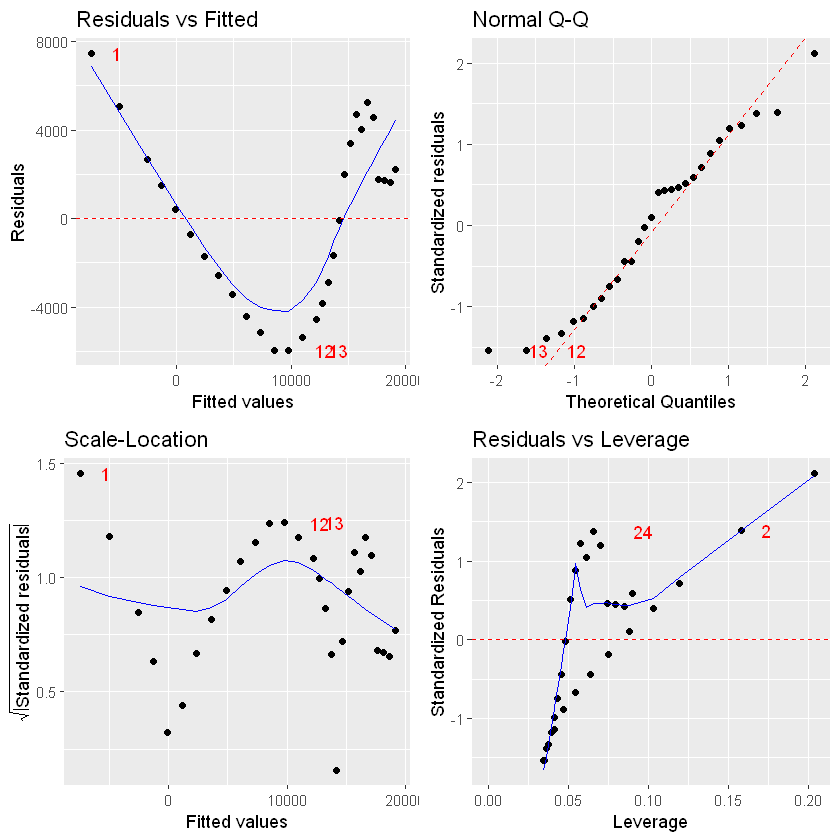

In [5]:
# 플롯 상의 점들이 선형의 형태가 아님을 살펴보아라. 이 데이터에 선형 모형을 적함하기 위해서 변수 원유 생산량(OIL) 이 변환되어야 한다.
autoplot(p189_reg
         , colour = "black"
         , label.hjust = -2
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")


Call:
lm(formula = log(Barrels) ~ Year, data = p189_1973_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30104 -0.05442 -0.01888  0.03877  0.27984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.213e+02  1.985e+00  -61.11   <2e-16 ***
Year         6.650e-02  1.025e-03   64.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1301 on 19 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9953 
F-statistic:  4207 on 1 and 19 DF,  p-value: < 2.2e-16


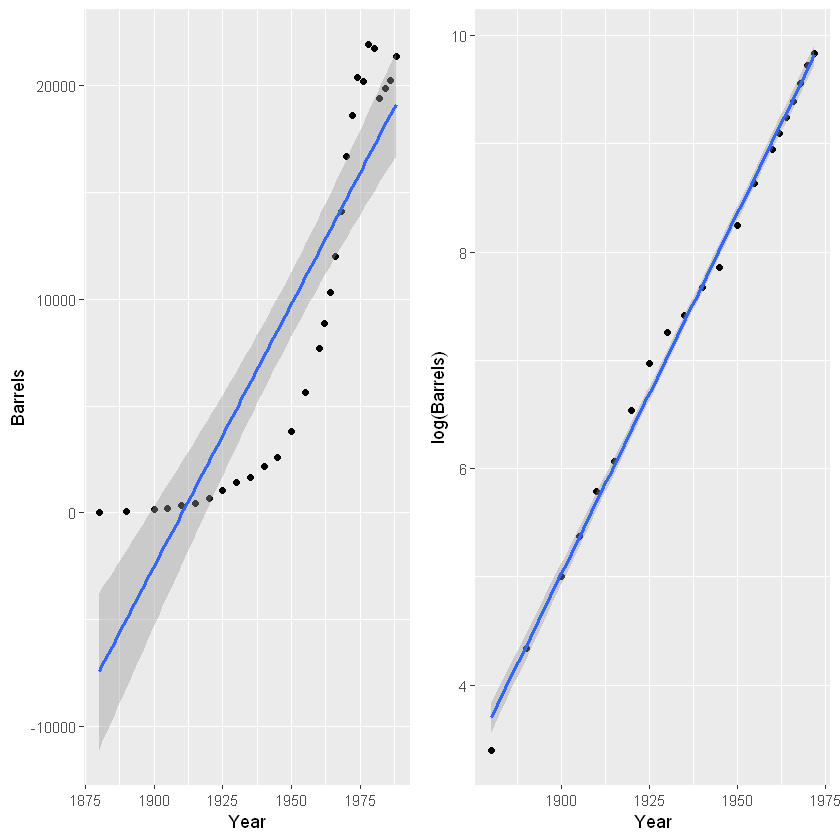

In [18]:
# (b) log(OIL) 대 Year 의 산점도를 작성하여라. 이제 플롯의 점 1880 ~ 1973년 기간에서 직선을 따른다.
# 1973년 이후에는 중동의 정치적 혼란이 원유 생산량의 패턴에 영향을 주었다.

p189_1973_data <- subset(p189_data, Year < 1973)
p189_1973_log_reg <- lm(log(Barrels) ~ Year, data = p189_1973_data)
summary(p189_1973_log_reg)

p1 <- ggplot(p189_data, aes(Year, Barrels)) + geom_point() + geom_smooth(method='lm')
p2 <- ggplot(p189_1973_data, aes(Year, log(Barrels))) + geom_point() + geom_smooth(method='lm')
grid.arrange(p1, p2, ncol=2, nrow=1)


Call:
lm(formula = log(Barrels) ~ Year, data = p189_1973_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30104 -0.05442 -0.01888  0.03877  0.27984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.213e+02  1.985e+00  -61.11   <2e-16 ***
Year         6.650e-02  1.025e-03   64.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1301 on 19 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9953 
F-statistic:  4207 on 1 and 19 DF,  p-value: < 2.2e-16


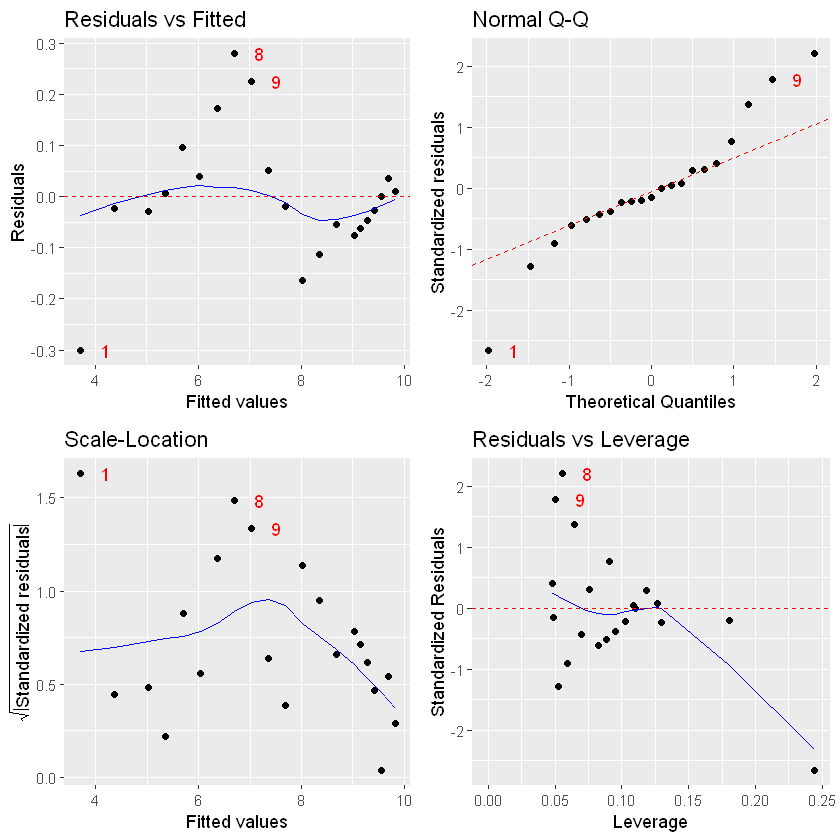

In [24]:
#(c) Year 에 대한 log(OIL) 의 선형 회귀를 적합하여래. 이 모형의 적합도를 평가 하여라.

p189_1973_log_reg <- lm(log(Barrels) ~ Year, data = p189_1973_data)
summary(p189_1973_log_reg)
autoplot(p189_1973_log_reg
         , colour = "black"
         , label.hjust = -2
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")

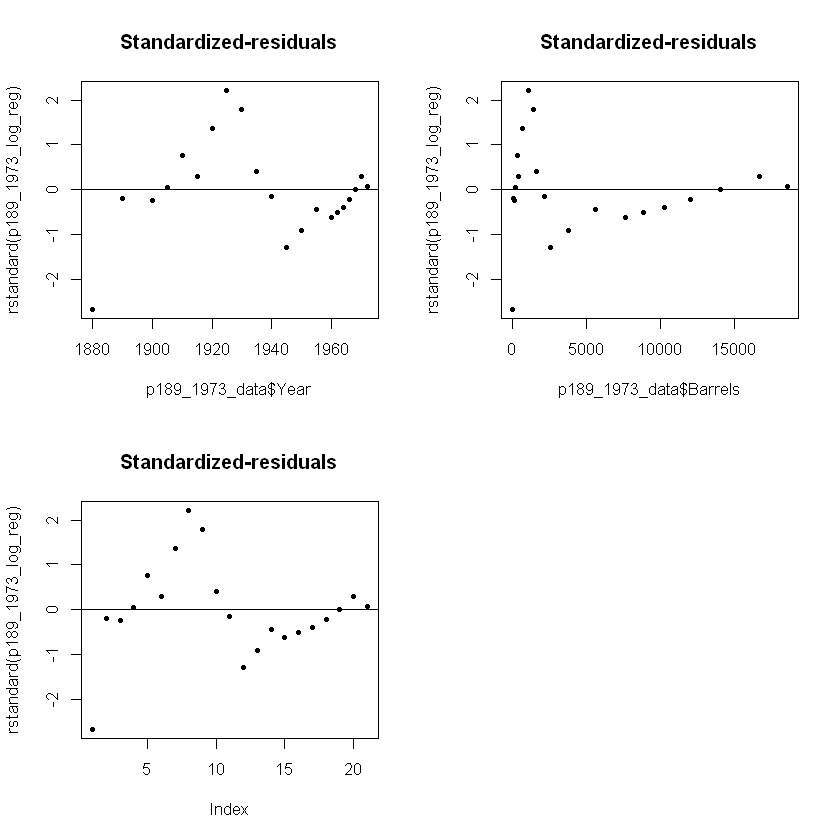

In [20]:
# (d) 표준화잔차의 인덱스(index) 플롯을 작성하여라. 이 플롯은 표준적인 가정중 어느것이 위배되는지를 명확하게 보여준다. 그것이 무엇인가?
par(mfrow = c(2,2))

plot(p189_1973_data$Year, rstandard(p189_1973_log_reg), pch = 20, main = "Standardized-residuals")
abline(h=0)

plot(p189_1973_data$Barrels, rstandard(p189_1973_log_reg), pch = 20, main = "Standardized-residuals")
abline(h=0)

plot(rstandard(p189_1973_log_reg), pch=20, main = "Standardized-residuals")
abline(h=0)